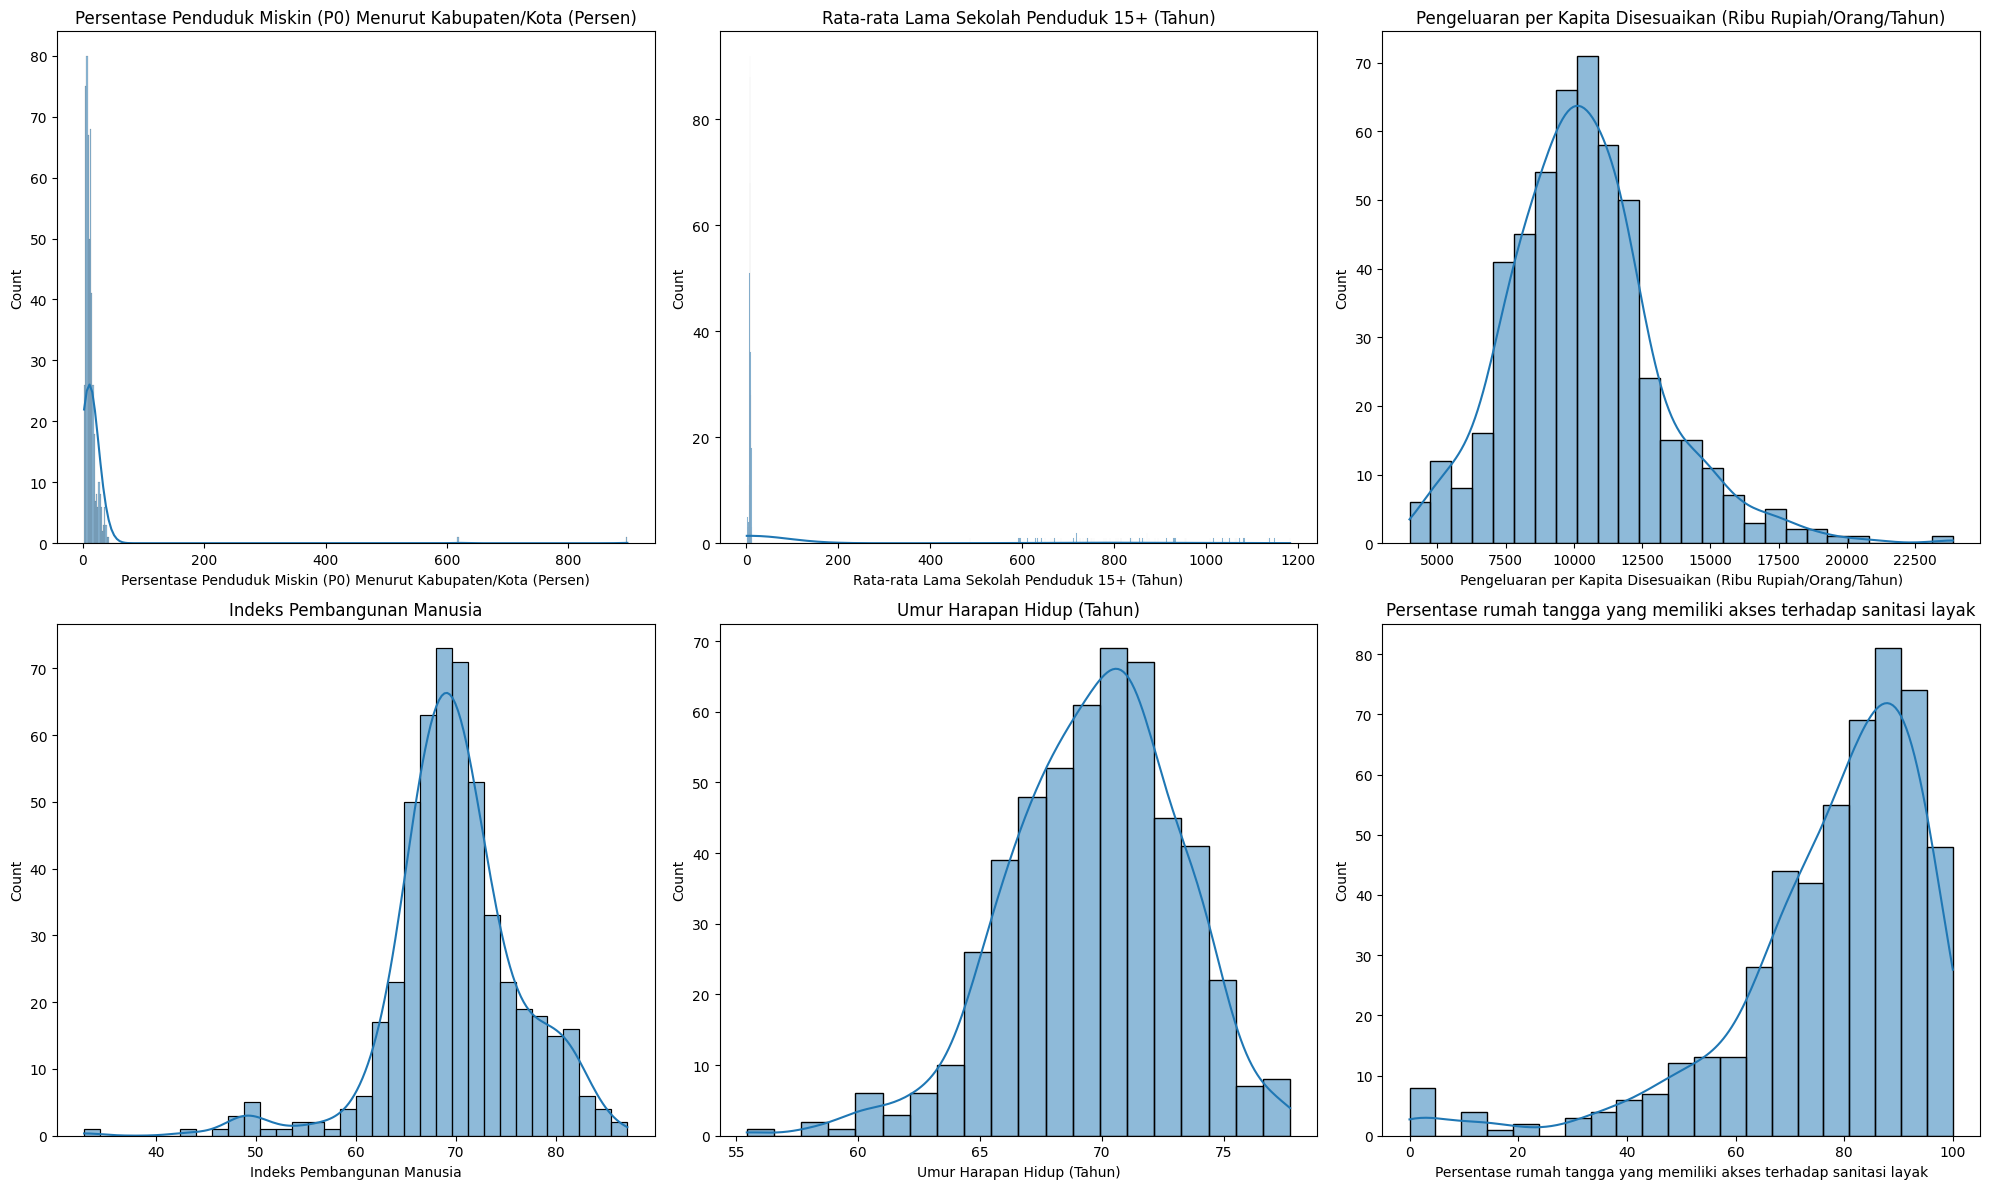

In [19]:
# %% [markdown]
# # Analisis Tingkat Kemiskinan di Indonesia

# %% [markdown]
# ## 1. Import Library

# %%
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             accuracy_score,
                             RocCurveDisplay,
                             PrecisionRecallDisplay)
from imblearn.over_sampling import SMOTE
import joblib


df = pd.read_csv('Klasifikasi Tingkat Kemiskinan di Indonesia.csv', 
                 sep=';', 
                 decimal=',', 
                 thousands='.')

df = df.dropna(how='all')

numeric_cols = [
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
    'Indeks Pembangunan Manusia',
    'Umur Harapan Hidup (Tahun)',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
    'Tingkat Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

df = df.dropna(subset=numeric_cols)


# %% [markdown]
# ## 3. Eksplorasi Data

# Figure 1
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()